In [1]:
import pandas as pd

In [2]:
df=pd.read_json(r"C:\Users\yuvin\Downloads\pokedex.json")

In [3]:
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pokemon  151 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [4]:
import json
try:
    pokeDexJsonStr = open(r"C:\Users\yuvin\Downloads\pokedex.json")
except (FileNotFoundError):
    print('Please check if the file name is correct or if the file exists in first place')
else:
    pokeDexJson = json.load(pokeDexJsonStr)
    print(type(pokeDexJson))

<class 'dict'>


In [5]:
import pprint
from pprint import pprint
pprint(pokeDexJson)

{'pokemon': [{'avg_spawns': 69,
              'candy': 'Bulbasaur Candy',
              'candy_count': 25,
              'egg': '2 km',
              'height': '0.71 m',
              'id': 1,
              'img': 'http://www.serebii.net/pokemongo/pokemon/001.png',
              'multipliers': [1.58],
              'name': 'Bulbasaur',
              'next_evolution': [{'name': 'Ivysaur', 'num': '002'},
                                 {'name': 'Venusaur', 'num': '003'}],
              'num': '001',
              'spawn_chance': 0.69,
              'spawn_time': '20:00',
              'type': ['Grass', 'Poison'],
              'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'],
              'weight': '6.9 kg'},
             {'avg_spawns': 4.2,
              'candy': 'Bulbasaur Candy',
              'candy_count': 100,
              'egg': 'Not in Eggs',
              'height': '0.99 m',
              'id': 2,
              'img': 'http://www.serebii.net/pokemongo/pokemon/002.png',
    

In [6]:
pokeDex = pd.json_normalize(pokeDexJson,record_path=['pokemon'])
pokeDex

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.84]","[Ice, Dragon, Fairy]","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"[Ice, Dragon, Fairy]","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,None,"[Ice, Rock, Dragon, Fairy]",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,N/A,None,"[Bug, Ghost, Dark]",NaN,NaN


In [7]:
dfType=pokeDex['type'].apply(lambda x:' '.join(x)).str.split(expand=True)
dfType.columns=['type_'+str(ele + 1) for ele in dfType.columns]

dfweaknesses=pokeDex['weaknesses'].apply(lambda x:' '.join(x)).str.split(expand=True)
dfweaknesses.columns=['weaknesses'+str(ele + 1) for ele in dfweaknesses.columns]

In [8]:
dfweaknesses

,weaknesses1,weaknesses2,weaknesses3,weaknesses4,weaknesses5,weaknesses6,weaknesses7
0,Fire,Ice,Flying,Psychic,None,None,None
1,Fire,Ice,Flying,Psychic,None,None,None
2,Fire,Ice,Flying,Psychic,None,None,None
3,Water,Ground,Rock,None,None,None,None
4,Water,Ground,Rock,None,None,None,None
...,...,...,...,...,...,...,...
146,Ice,Dragon,Fairy,None,None,None,None
147,Ice,Dragon,Fairy,None,None,None,None
148,Ice,Rock,Dragon,Fairy,None,None,None
149,Bug,Ghost,Dark,None,None,None,None


In [9]:
pokeDex = pd.concat([pokeDex,dfType,dfweaknesses],axis = 1)
pokeDex

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,prev_evolution,type_1,type_2,weaknesses1,weaknesses2,weaknesses3,weaknesses4,weaknesses5,weaknesses6,weaknesses7
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,NaN,Grass,Poison,Fire,Ice,Flying,Psychic,None,None,None
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,"[{'num': '001', 'name': 'Bulbasaur'}]",Grass,Poison,Fire,Ice,Flying,Psychic,None,None,None
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",Grass,Poison,Fire,Ice,Flying,Psychic,None,None,None
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,NaN,Fire,None,Water,Ground,Rock,None,None,None,None
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,"[{'num': '004', 'name': 'Charmander'}]",Fire,None,Water,Ground,Rock,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,NaN,Dragon,None,Ice,Dragon,Fairy,None,None,None,None
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,"[{'num': '147', 'name': 'Dratini'}]",Dragon,None,Ice,Dragon,Fairy,None,None,None,None
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,...,"[{'num': '147', 'name': 'Dratini'}, {'num': '1...",Dragon,Flying,Ice,Rock,Dragon,Fairy,None,None,None
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,...,NaN,Psychic,None,Bug,Ghost,Dark,None,None,None,None


In [10]:
pokeDex.columns

Index(['id', 'num', 'name', 'img', 'type', 'height', 'weight', 'candy',
       'candy_count', 'egg', 'spawn_chance', 'avg_spawns', 'spawn_time',
       'multipliers', 'weaknesses', 'next_evolution', 'prev_evolution',
       'type_1', 'type_2', 'weaknesses1', 'weaknesses2', 'weaknesses3',
       'weaknesses4', 'weaknesses5', 'weaknesses6', 'weaknesses7'],
      dtype='object')

In [11]:
pokeDex[['next_evolution','prev_evolution']]

,next_evolution,prev_evolution
0,"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,"[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,"[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,"[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
...,...,...
146,"[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN
147,"[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,NaN,NaN


In [12]:
pokeDex.drop(columns=['type','weaknesses'],inplace=True)

In [13]:
def foo(l):
    try:
        iterator=iter(l)
    except TypeError:
        return None
    else:
        return  [[ele['num'],ele['name']] for ele in l]

In [14]:
pokeDex['next_evolution'].apply(foo)

0          [[002, Ivysaur], [003, Venusaur]]
1                          [[003, Venusaur]]
2                                       None
3      [[005, Charmeleon], [006, Charizard]]
4                         [[006, Charizard]]
                       ...                  
146     [[148, Dragonair], [149, Dragonite]]
147                       [[149, Dragonite]]
148                                     None
149                                     None
150                                     None
Name: next_evolution, Length: 151, dtype: object

In [15]:
def foo(l):
    try:
        iterator=iter(l)
    except TypeError:
        return None
    else:
        return  [ele['num'] for ele in l]

In [16]:
dfNextEvolution = pokeDex['next_evolution'].apply(lambda x: foo(x)).apply(pd.Series)
dfNextEvolution

,0,1,2
0,002,003,NaN
1,003,NaN,NaN
2,NaN,NaN,NaN
3,005,006,NaN
4,006,NaN,NaN
...,...,...,...
146,148,149,NaN
147,149,NaN,NaN
148,NaN,NaN,NaN
149,NaN,NaN,NaN


In [17]:
dfPrevEvolution = pokeDex['prev_evolution'].apply(lambda x: foo(x)).apply(pd.Series)
dfPrevEvolution

,0,1
0,NaN,NaN
1,001,NaN
2,001,002
3,NaN,NaN
4,004,NaN
...,...,...
146,NaN,NaN
147,147,NaN
148,147,148
149,NaN,NaN


In [18]:
def foo(l):
    try:
        iterator=iter(l)
    except TypeError:
        return None
    else:
        return  [ele['num'] for ele in l]

In [19]:
dfNextEvolution = pokeDex['next_evolution'].apply(lambda x: foo(x)).apply(pd.Series)
dfPrevEvolution = pokeDex['prev_evolution'].apply(lambda x: foo(x)).apply(pd.Series)


In [20]:
dfNextEvolution

,0,1,2
0,002,003,NaN
1,003,NaN,NaN
2,NaN,NaN,NaN
3,005,006,NaN
4,006,NaN,NaN
...,...,...,...
146,148,149,NaN
147,149,NaN,NaN
148,NaN,NaN,NaN
149,NaN,NaN,NaN


In [21]:
dfNextEvolution.applymap(pd.Series)

,0,1,2
0,0 002 dtype: object,0 003 dtype: object,0 NaN dtype: float64
1,0 003 dtype: object,0 NaN dtype: float64,0 NaN dtype: float64
2,0 NaN dtype: float64,0 NaN dtype: float64,0 NaN dtype: float64
3,0 005 dtype: object,0 006 dtype: object,0 NaN dtype: float64
4,0 006 dtype: object,0 NaN dtype: float64,0 NaN dtype: float64
...,...,...,...
146,0 148 dtype: object,0 149 dtype: object,0 NaN dtype: float64
147,0 149 dtype: object,0 NaN dtype: float64,0 NaN dtype: float64
148,0 NaN dtype: float64,0 NaN dtype: float64,0 NaN dtype: float64
149,0 NaN dtype: float64,0 NaN dtype: float64,0 NaN dtype: float64


In [22]:
dfNextEvolution

,0,1,2
0,002,003,NaN
1,003,NaN,NaN
2,NaN,NaN,NaN
3,005,006,NaN
4,006,NaN,NaN
...,...,...,...
146,148,149,NaN
147,149,NaN,NaN
148,NaN,NaN,NaN
149,NaN,NaN,NaN


In [23]:
def foo(l):
    try:
        iterator=iter(l)
    except TypeError:
        return None
    else:
        return  [ele['num'] for ele in l]

In [24]:
dfNextEvolution

,0,1,2
0,002,003,NaN
1,003,NaN,NaN
2,NaN,NaN,NaN
3,005,006,NaN
4,006,NaN,NaN
...,...,...,...
146,148,149,NaN
147,149,NaN,NaN
148,NaN,NaN,NaN
149,NaN,NaN,NaN


In [25]:
dfPrevEvolution.columns = [str(ele)+'st_PreEvolution' for ele in dfPrevEvolution.columns[::-1]]

In [26]:
dfPrevEvolution

,1st_PreEvolution,0st_PreEvolution
0,NaN,NaN
1,001,NaN
2,001,002
3,NaN,NaN
4,004,NaN
...,...,...
146,NaN,NaN
147,147,NaN
148,147,148
149,NaN,NaN


In [27]:
dfPrevEvolution.rename(columns={'0st_PreEvolution':'2nd_PreEvolution'},inplace=True)

In [28]:
dfPrevEvolution

,1st_PreEvolution,2nd_PreEvolution
0,NaN,NaN
1,001,NaN
2,001,002
3,NaN,NaN
4,004,NaN
...,...,...
146,NaN,NaN
147,147,NaN
148,147,148
149,NaN,NaN


In [29]:
dfNextEvolution.columns = [str(ele) + 'nd_NextEvolution' for ele in dfNextEvolution.columns]


In [30]:
dfNextEvolution

,0nd_NextEvolution,1nd_NextEvolution,2nd_NextEvolution
0,002,003,NaN
1,003,NaN,NaN
2,NaN,NaN,NaN
3,005,006,NaN
4,006,NaN,NaN
...,...,...,...
146,148,149,NaN
147,149,NaN,NaN
148,NaN,NaN,NaN
149,NaN,NaN,NaN


In [42]:
dfNextEvolution.rename(columns={'0nd_NextEvolution':'1_NextEvolution'},inplace=True)

In [43]:
dfNextEvolution.rename(columns={'1nd_NextEvolution':'2_NextEvolution'},inplace=True)

In [44]:
dfNextEvolution.rename(columns={'2nd_NextEvolution':'3_NextEvolution'},inplace=True)

In [45]:
dfNextEvolution

,1st_NextEvolution,2_NextEvolution,3_NextEvolution
0,002,003,NaN
1,003,NaN,NaN
2,NaN,NaN,NaN
3,005,006,NaN
4,006,NaN,NaN
...,...,...,...
146,148,149,NaN
147,149,NaN,NaN
148,NaN,NaN,NaN
149,NaN,NaN,NaN


In [49]:
pokeDex=pd.concat([pokeDex,dfPrevEvolution,dfNextEvolution],axis=1)

In [50]:
pokeDex

,id,num,name,img,height,weight,candy,candy_count,egg,spawn_chance,...,weaknesses3,weaknesses4,weaknesses5,weaknesses6,weaknesses7,1st_PreEvolution,2nd_PreEvolution,1st_NextEvolution,2_NextEvolution,3_NextEvolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,...,Flying,Psychic,None,None,None,NaN,NaN,002,003,NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,...,Flying,Psychic,None,None,None,001,NaN,003,NaN,NaN
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,...,Flying,Psychic,None,None,None,001,002,NaN,NaN,NaN
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,...,Rock,None,None,None,None,NaN,NaN,005,006,NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,...,Rock,None,None,None,None,004,NaN,006,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,...,Fairy,None,None,None,None,NaN,NaN,148,149,NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,...,Fairy,None,None,None,None,147,NaN,149,NaN,NaN
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,...,Dragon,Fairy,None,None,None,147,148,NaN,NaN,NaN
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,...,Dark,None,None,None,None,NaN,NaN,NaN,NaN,NaN


In [51]:
pokeDex.columns

Index(['id', 'num', 'name', 'img', 'height', 'weight', 'candy', 'candy_count',
       'egg', 'spawn_chance', 'avg_spawns', 'spawn_time', 'multipliers',
       'next_evolution', 'prev_evolution', 'type_1', 'type_2', 'weaknesses1',
       'weaknesses2', 'weaknesses3', 'weaknesses4', 'weaknesses5',
       'weaknesses6', 'weaknesses7', '1st_PreEvolution', '2nd_PreEvolution',
       '1st_NextEvolution', '2_NextEvolution', '3_NextEvolution'],
      dtype='object')

In [32]:
pokeDex

,id,num,name,img,height,weight,candy,candy_count,egg,spawn_chance,...,prev_evolution,type_1,type_2,weaknesses1,weaknesses2,weaknesses3,weaknesses4,weaknesses5,weaknesses6,weaknesses7
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,...,NaN,Grass,Poison,Fire,Ice,Flying,Psychic,None,None,None
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,...,"[{'num': '001', 'name': 'Bulbasaur'}]",Grass,Poison,Fire,Ice,Flying,Psychic,None,None,None
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,...,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",Grass,Poison,Fire,Ice,Flying,Psychic,None,None,None
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,...,NaN,Fire,None,Water,Ground,Rock,None,None,None,None
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,...,"[{'num': '004', 'name': 'Charmander'}]",Fire,None,Water,Ground,Rock,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,...,NaN,Dragon,None,Ice,Dragon,Fairy,None,None,None,None
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,...,"[{'num': '147', 'name': 'Dratini'}]",Dragon,None,Ice,Dragon,Fairy,None,None,None,None
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,...,"[{'num': '147', 'name': 'Dratini'}, {'num': '1...",Dragon,Flying,Ice,Rock,Dragon,Fairy,None,None,None
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,...,NaN,Psychic,None,Bug,Ghost,Dark,None,None,None,None


In [52]:
pokeDex.columns

Index(['id', 'num', 'name', 'img', 'height', 'weight', 'candy', 'candy_count',
       'egg', 'spawn_chance', 'avg_spawns', 'spawn_time', 'multipliers',
       'next_evolution', 'prev_evolution', 'type_1', 'type_2', 'weaknesses1',
       'weaknesses2', 'weaknesses3', 'weaknesses4', 'weaknesses5',
       'weaknesses6', 'weaknesses7', '1st_PreEvolution', '2nd_PreEvolution',
       '1st_NextEvolution', '2_NextEvolution', '3_NextEvolution'],
      dtype='object')

In [56]:
pokeDex.drop(columns=['next_evolution','prev_evolution'],inplace=True)

In [57]:
pokeDex

,id,num,name,img,height,weight,candy,candy_count,egg,spawn_chance,...,weaknesses3,weaknesses4,weaknesses5,weaknesses6,weaknesses7,1st_PreEvolution,2nd_PreEvolution,1st_NextEvolution,2_NextEvolution,3_NextEvolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,...,Flying,Psychic,None,None,None,NaN,NaN,002,003,NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,...,Flying,Psychic,None,None,None,001,NaN,003,NaN,NaN
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,...,Flying,Psychic,None,None,None,001,002,NaN,NaN,NaN
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,...,Rock,None,None,None,None,NaN,NaN,005,006,NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,...,Rock,None,None,None,None,004,NaN,006,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,...,Fairy,None,None,None,None,NaN,NaN,148,149,NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,...,Fairy,None,None,None,None,147,NaN,149,NaN,NaN
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,...,Dragon,Fairy,None,None,None,147,148,NaN,NaN,NaN
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,...,Dark,None,None,None,None,NaN,NaN,NaN,NaN,NaN


In [58]:
pokeDex.columns

Index(['id', 'num', 'name', 'img', 'height', 'weight', 'candy', 'candy_count',
       'egg', 'spawn_chance', 'avg_spawns', 'spawn_time', 'multipliers',
       'type_1', 'type_2', 'weaknesses1', 'weaknesses2', 'weaknesses3',
       'weaknesses4', 'weaknesses5', 'weaknesses6', 'weaknesses7',
       '1st_PreEvolution', '2nd_PreEvolution', '1st_NextEvolution',
       '2_NextEvolution', '3_NextEvolution'],
      dtype='object')

In [34]:
kaggle_dataset=pd.read_csv(r"C:\Users\yuvin\Downloads\archive (2).zip")

In [35]:
kaggle_dataset

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [59]:
pokemon=pd.merge(pokeDex,kaggle_dataset,how='right')

In [60]:
pokemon

,id,num,name,img,height,weight,candy,candy_count,egg,spawn_chance,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,1.0,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,2.0,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,3.0,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,4.0,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,5.0,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,NaN,NaN,Celesteela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,NaN,NaN,Kartana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,NaN,NaN,Guzzlord,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,NaN,NaN,Necrozma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [64]:
pokemon.isnull().sum()

id              652
num             652
name              0
img             652
height          652
               ... 
type1             0
type2           384
weight_kg        20
generation        0
is_legendary      0
Length: 67, dtype: int64

In [69]:
pokemon.head(150).isnull().sum()

id               2
num              2
name             0
img              2
height           2
                ..
type1            0
type2           69
weight_kg       18
generation       0
is_legendary     0
Length: 67, dtype: int64

In [73]:
pokemon['num'] = pd.to_numeric(pokemon['num'], errors='coerce')
pokemon = pokemon[pokemon['num'] <= 151]

In [75]:
pokemon.columns

Index(['id', 'num', 'name', 'img', 'height', 'weight', 'candy', 'candy_count',
       'egg', 'spawn_chance', 'avg_spawns', 'spawn_time', 'multipliers',
       'type_1', 'type_2', 'weaknesses1', 'weaknesses2', 'weaknesses3',
       'weaknesses4', 'weaknesses5', 'weaknesses6', 'weaknesses7',
       '1st_PreEvolution', '2nd_PreEvolution', '1st_NextEvolution',
       '2_NextEvolution', '3_NextEvolution', 'abilities', 'against_bug',
       'against_dark', 'against_dragon', 'against_electric', 'against_fairy',
       'against_fight', 'against_fire', 'against_flying', 'against_ghost',
       'against_grass', 'against_ground', 'against_ice', 'against_normal',
       'against_poison', 'against_psychic', 'against_rock', 'against_steel',
       'against_water', 'attack', 'base_egg_steps', 'base_happiness',
       'base_total', 'capture_rate', 'classfication', 'defense',
       'experience_growth', 'height_m', 'hp', 'japanese_name',
       'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defe

In [78]:
pokemon['type_1']

0        Grass
1        Grass
2        Grass
3         Fire
4         Fire
        ...   
146     Dragon
147     Dragon
148     Dragon
149    Psychic
150    Psychic
Name: type_1, Length: 149, dtype: object

In [83]:
pokemon

,id,num,name,img,height,weight,candy,candy_count,egg,spawn_chance,...,hp,japanese_name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,...,45,Fushigidaneフシギダネ,88.1,1,65,65,45,6.9,1,0
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,...,60,Fushigisouフシギソウ,88.1,2,80,80,60,13.0,1,0
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,...,80,Fushigibanaフシギバナ,88.1,3,122,120,80,100.0,1,0
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,...,39,Hitokageヒトカゲ,88.1,4,60,50,65,8.5,1,0
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,...,58,Lizardoリザード,88.1,5,80,65,80,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,...,41,Miniryuミニリュウ,50.0,147,50,50,50,3.3,1,0
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,...,61,Hakuryuハクリュー,50.0,148,70,70,70,16.5,1,0
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,...,91,Kairyuカイリュー,50.0,149,100,100,80,210.0,1,0
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,...,106,Mewtwoミュウツー,NaN,150,194,120,140,122.0,1,1


In [88]:
pokemon.columns

Index(['id', 'num', 'name', 'img', 'height', 'weight', 'candy', 'candy_count',
       'egg', 'spawn_chance', 'avg_spawns', 'spawn_time', 'multipliers',
       'type_1', 'type_2', 'weaknesses1', 'weaknesses2', 'weaknesses3',
       'weaknesses4', 'weaknesses5', 'weaknesses6', 'weaknesses7',
       '1st_PreEvolution', '2nd_PreEvolution', '1st_NextEvolution',
       '2_NextEvolution', '3_NextEvolution', 'abilities', 'against_bug',
       'against_dark', 'against_dragon', 'against_electric', 'against_fairy',
       'against_fight', 'against_fire', 'against_flying', 'against_ghost',
       'against_grass', 'against_ground', 'against_ice', 'against_normal',
       'against_poison', 'against_psychic', 'against_rock', 'against_steel',
       'against_water', 'attack', 'base_egg_steps', 'base_happiness',
       'base_total', 'capture_rate', 'classfication', 'defense',
       'experience_growth', 'height_m', 'hp', 'japanese_name',
       'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defe

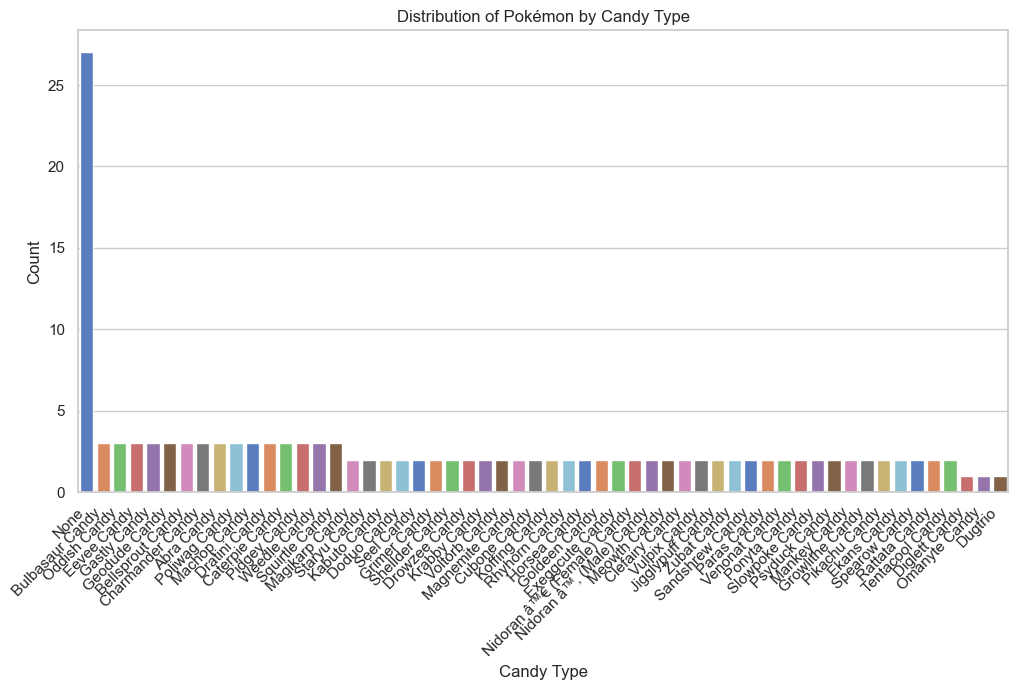

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'candy' is the column representing Pokemon candies
# Replace it with the actual column name if different
plt.figure(figsize=(12, 6))
sns.countplot(x='candy', data=pokemon, palette="muted", order=pokemon['candy'].value_counts().index)
plt.title('Distribution of Pokemon by Candy Type')
plt.xlabel('Candy Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


# The distribution of the primary type in pokemon data

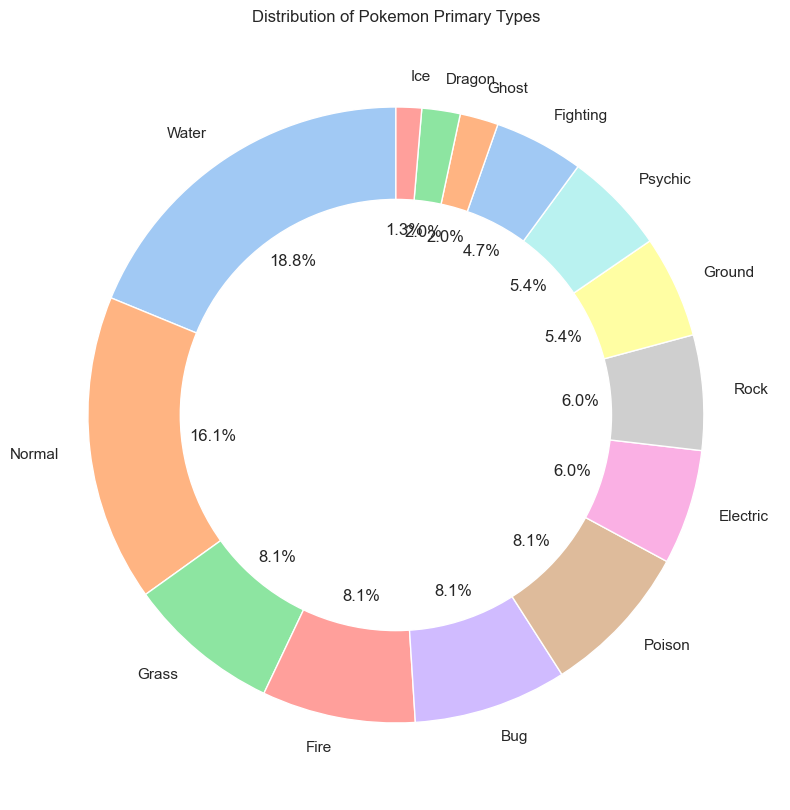

In [116]:
# creating a figure of size 10,10
plt.figure(figsize=(10, 10))
#assiging a variable to find the number of primary type 
type_counts = pokemon['type_1'].value_counts()
#using the pie plot from matplotlib and assiging the values to the parameters
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
centre_circle = plt.Circle((0,0),0.70,fc='white')# giving the distance in the center of the pie plot
fig = plt.gcf()#plt.gcf() is used to access the current figure (fig)
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Pokemon Primary Types')#Giving a title to figure
plt.show()


In [ ]:
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

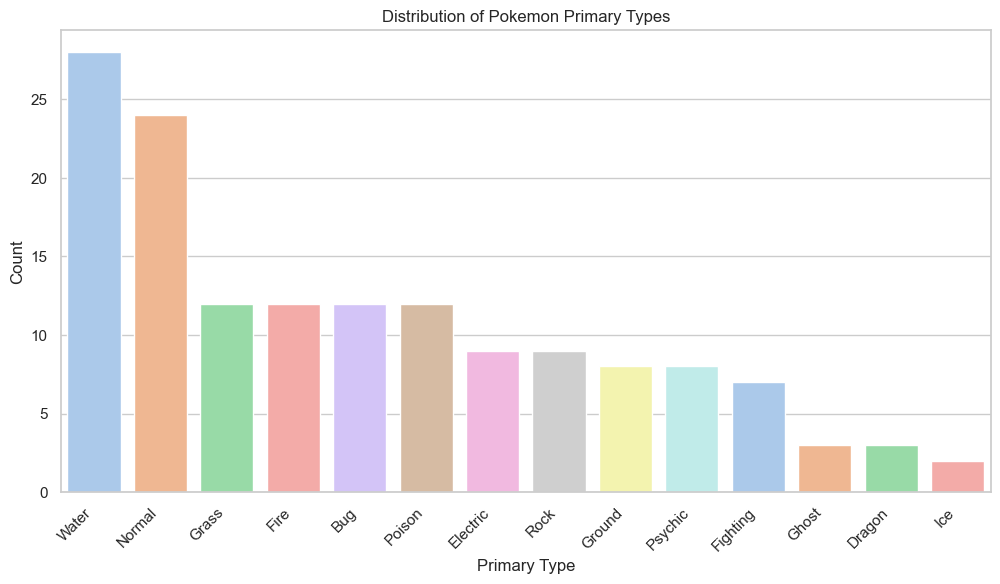

In [98]:
# Assuming 'type_1' is the column representing Pokemon primary types
plt.figure(figsize=(12, 6))
sns.countplot(x='type_1', data=pokemon, palette=sns.color_palette("pastel"), order=pokemon['type_1'].value_counts().index)
plt.title('Distribution of Pokemon Primary Types')
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


# The swarm plot for primary type

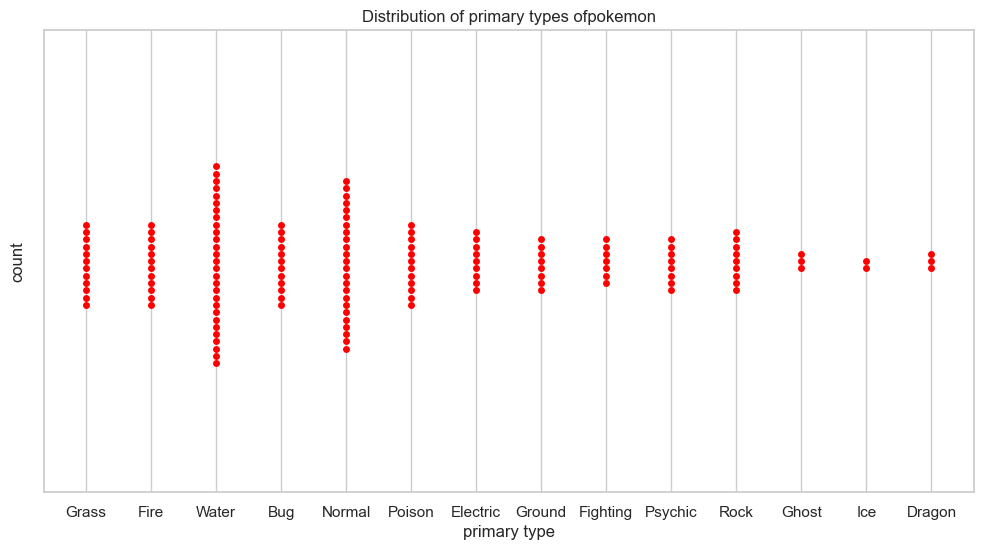

In [106]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='type_1',data=pokemon,color='red')
plt.title('Distribution of primary types ofpokemon')
plt.xlabel('primary type')
plt.ylabel('count')
plt.show()

# The bar plot for secondary evolution type

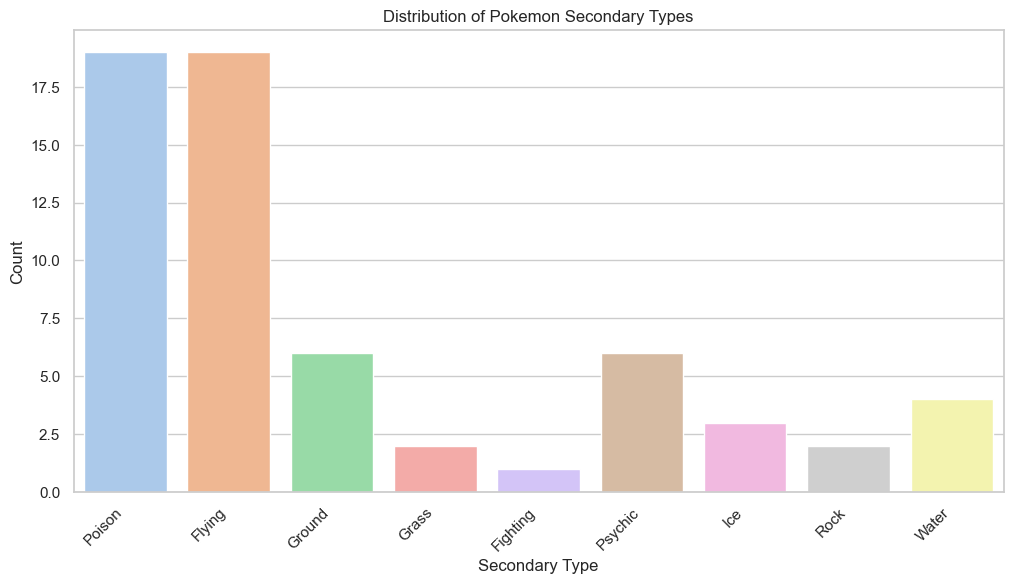

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'type_2' is the column representing Pokemon secondary types
plt.figure(figsize=(12, 6))
sns.countplot(x='type_2', data=pokemon, palette="pastel")
plt.title('Distribution of Pokemon Secondary Types')
plt.xlabel('Secondary Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


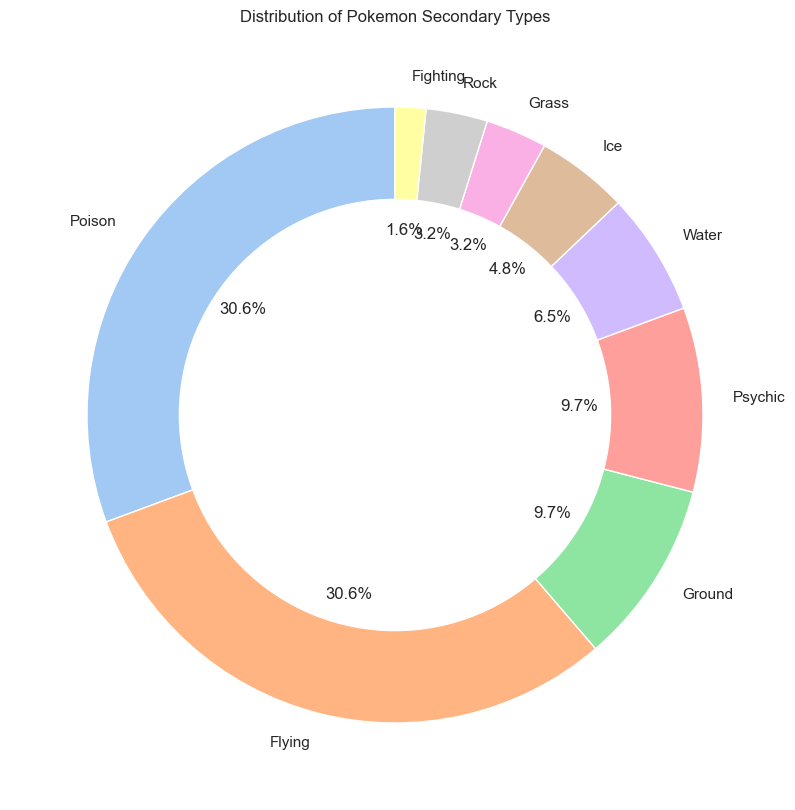

In [117]:
# creating a figure of size 10,10
plt.figure(figsize=(10, 10))
#assiging a variable to find the number of primary type 
type_counts = pokemon['type_2'].value_counts()
#using the pie plot from matplotlib and assiging the values to the parameters
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
centre_circle = plt.Circle((0,0),0.70,fc='white')# giving the distance in the center of the pie plot
fig = plt.gcf()#plt.gcf() is used to access the current figure (fig)
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Pokemon Secondary Types')#Giving a title to figure
plt.show()


# Swarm plot for secondary type

In [125]:
import warnings
warnings.filterwarnings('ignore')


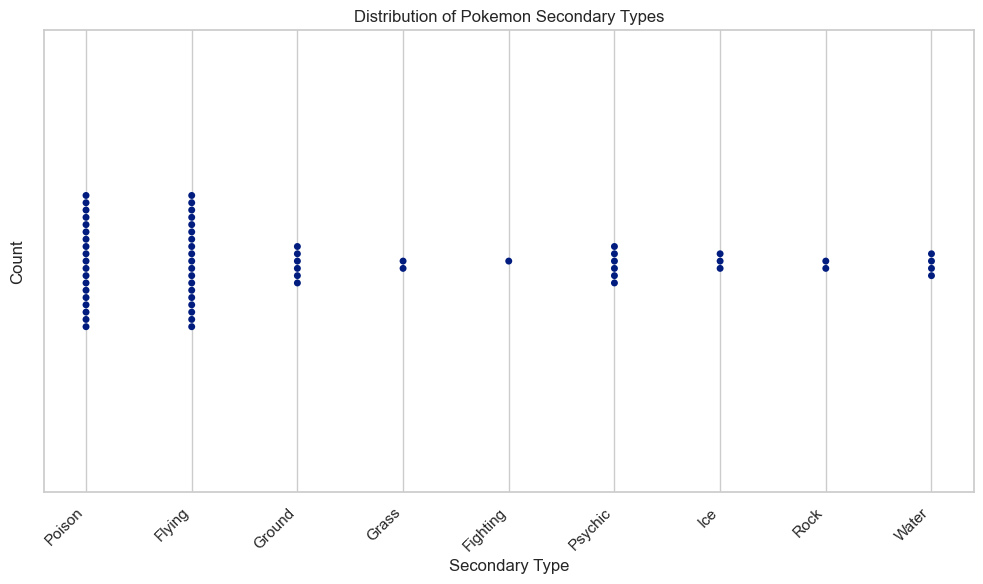

In [126]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='type_2', data=pokemon, palette="dark")
plt.title('Distribution of Pokemon Secondary Types')
plt.xlabel('Secondary Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# Tree map for secondary type

In [137]:
import plotly.express as px
import plotly.offline as pyo

# Assuming 'type_2' is the column representing Pokémon secondary types
# Replace it with the actual column name if different
type_2_counts = pokemon['type_2'].value_counts().reset_index()
type_2_counts.columns = ['Type', 'Count']

fig = px.treemap(type_2_counts, path=['Type'], values='Count', title='Tree Map of Pokémon Secondary Types')

# Save the tree map as an HTML file
pyo.plot(fig)


'temp-plot.html'

# count plot 

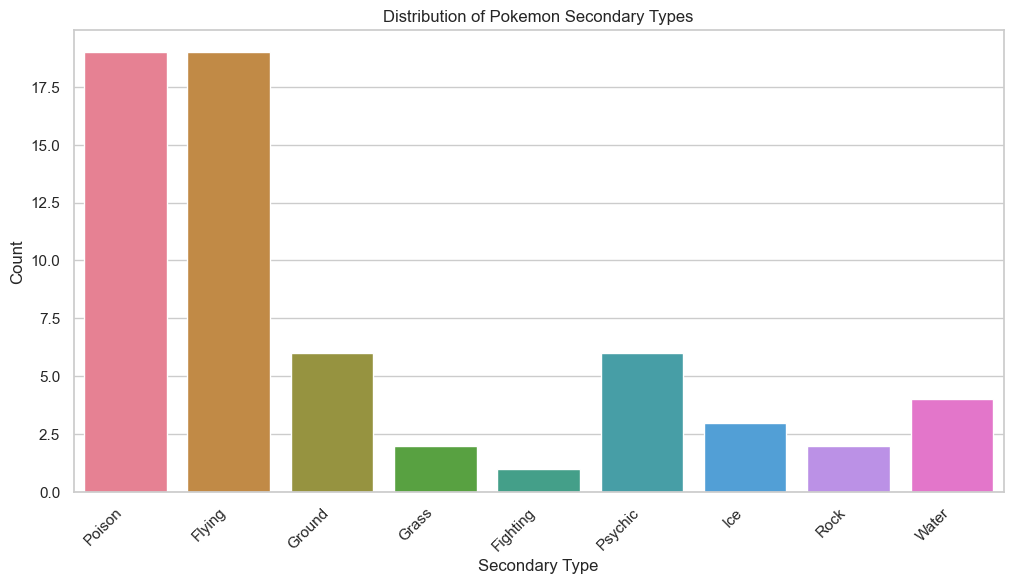

In [149]:
plt.figure(figsize=(12, 6))
sns.countplot(x='type_2', data=pokemon, palette="husl")
plt.title('Distribution of Pokemon Secondary Types')
plt.xlabel('Secondary Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [151]:
import pandas as pd

# Assuming 'type_1' and 'generation' are columns in your DataFrame
# Replace them with the actual column names if different
cross_table = pd.crosstab(pokemon['type_1'], pokemon['is_legendary'])

# Display the resulting cross-tabulation
print(cross_table)


is_legendary   0  1
type_1             
Bug           12  0
Dragon         3  0
Electric       8  1
Fighting       7  0
Fire          11  1
Ghost          3  0
Grass         12  0
Ground         8  0
Ice            1  1
Normal        24  0
Poison        12  0
Psychic        6  2
Rock           9  0
Water         28  0


# Heat map for primary and generation

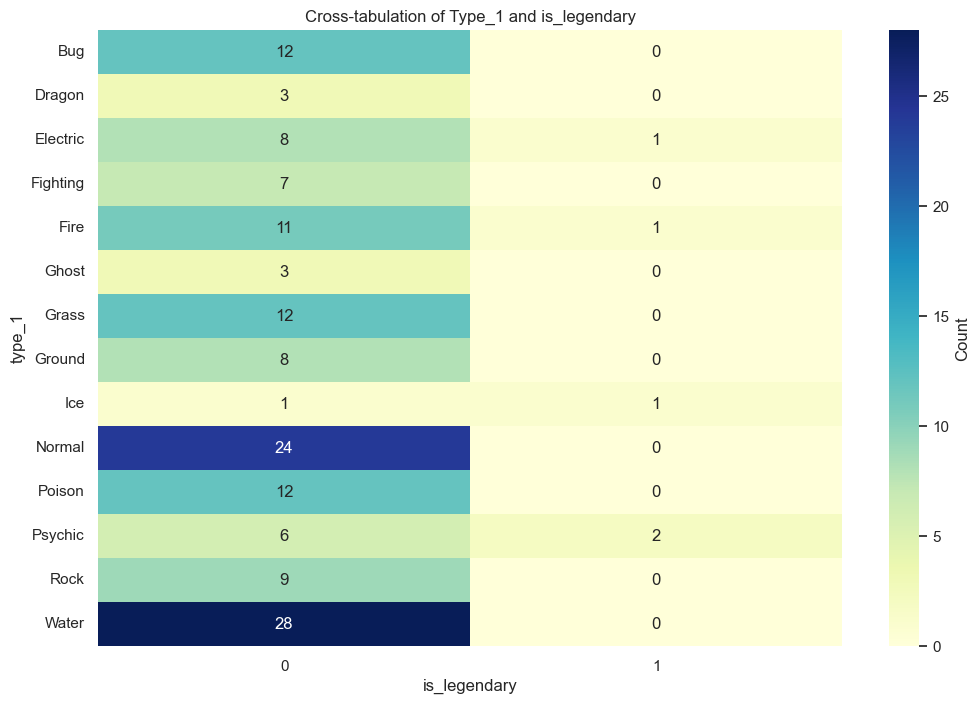

In [152]:
# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_table, annot=True, cmap='YlGnBu', fmt='d', cbar_kws={'label': 'Count'})
plt.title('Cross-tabulation of Type_1 and is_legendary')
plt.show()


# Scatter plot for height and weight

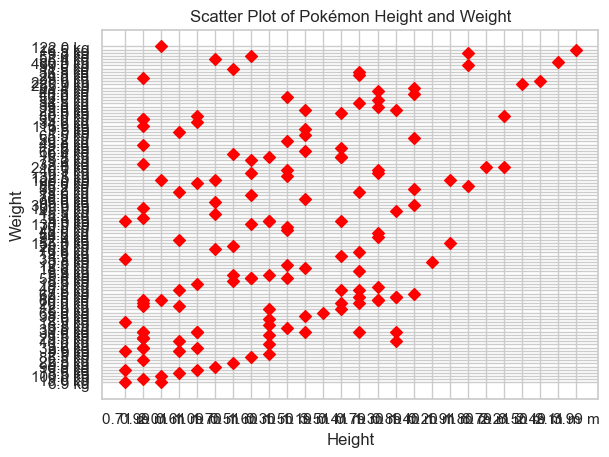

In [158]:
import matplotlib.pyplot as plt
# Assuming 'height' and 'weight' are columns in your DataFrame
plt.scatter(pokemon['height'], pokemon['weight'],marker='D',color='red')
plt.title('Scatter Plot of Pokémon Height and Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()


In [168]:
pokemon.columns

Index(['id', 'num', 'name', 'img', 'height', 'weight', 'candy', 'candy_count',
       'egg', 'spawn_chance', 'avg_spawns', 'spawn_time', 'multipliers',
       'type_1', 'type_2', 'weaknesses1', 'weaknesses2', 'weaknesses3',
       'weaknesses4', 'weaknesses5', 'weaknesses6', 'weaknesses7',
       '1st_PreEvolution', '2nd_PreEvolution', '1st_NextEvolution',
       '2_NextEvolution', '3_NextEvolution', 'abilities', 'against_bug',
       'against_dark', 'against_dragon', 'against_electric', 'against_fairy',
       'against_fight', 'against_fire', 'against_flying', 'against_ghost',
       'against_grass', 'against_ground', 'against_ice', 'against_normal',
       'against_poison', 'against_psychic', 'against_rock', 'against_steel',
       'against_water', 'attack', 'base_egg_steps', 'base_happiness',
       'base_total', 'capture_rate', 'classfication', 'defense',
       'experience_growth', 'height_m', 'hp', 'japanese_name',
       'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defe

In [178]:
pokemon['attack']

0       49
1       62
2      100
3       52
4       64
      ... 
146     64
147     84
148    134
149    150
150    100
Name: attack, Length: 149, dtype: int64

# Boxenplot for attack 

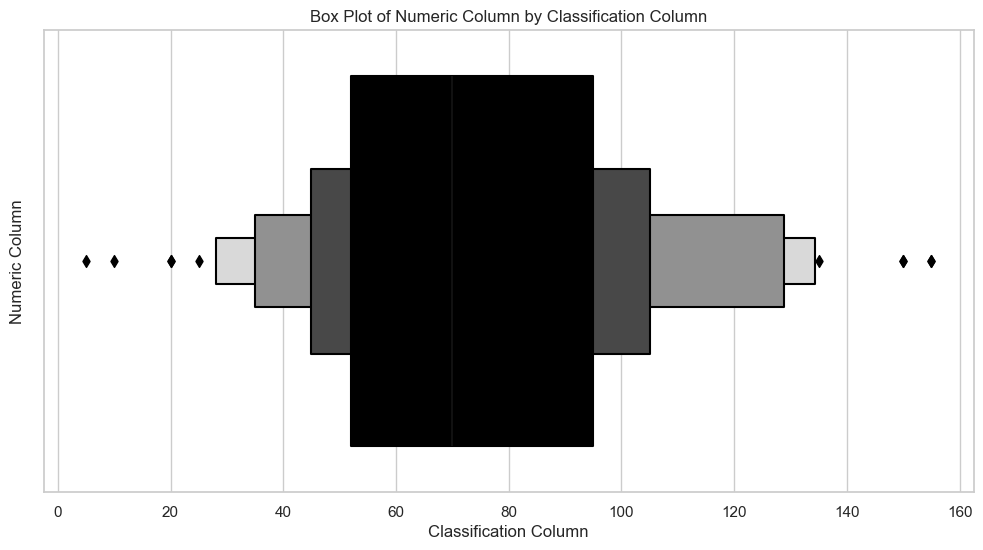

In [181]:
plt.figure(figsize=(12, 6))
sns.boxenplot(x='attack', data=pokemon,color='black')

plt.title('Box Plot of Numeric Column by Classification Column')
plt.xlabel('Classification Column')
plt.ylabel('Numeric Column')
plt.show()

# heat map for Correlation Between Attributes of Non-legendary Pokemon

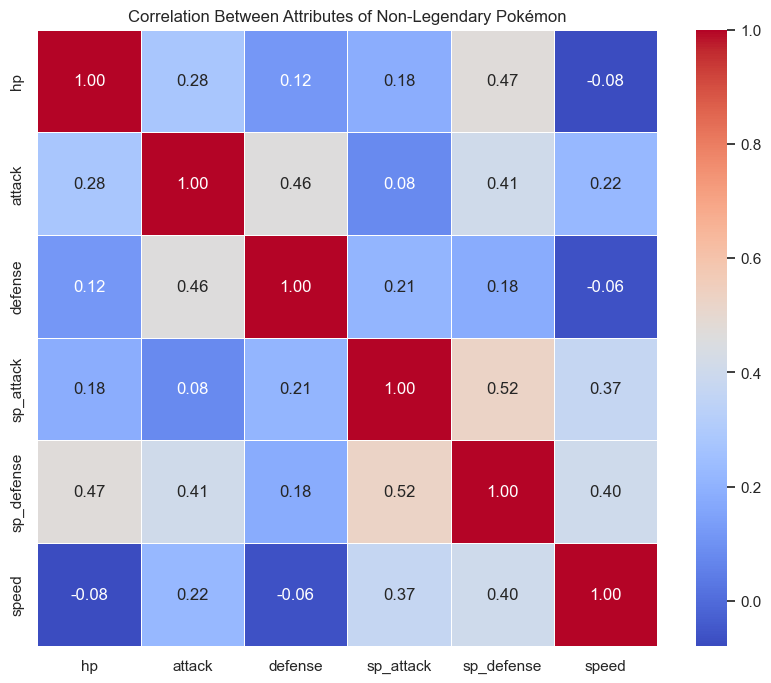

In [182]:
# Filter non-legendary Pokémon
non_legendary_pokemon = pokemon[pokemon['is_legendary'] == 0]

# Select relevant attributes for correlation analysis
attributes = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# Compute the correlation matrix
correlation_matrix = non_legendary_pokemon[attributes].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Attributes of Non-Legendary Pokémon')
plt.show()